# Integrating OpenQAOA ans Azure quantum

In this notebook we showcase the OpenQAOA workflows. The notebook is divided into three parts:

* The default QAOA workflow on the ionq.simulator
* An advanced QAOA workflow on the rigetti QVM
* An RQAOA workflow on the rigetti QVM

## Default QAOA on the IonQ Emulator

In [19]:
from openqaoa.devices import create_device
device_azure = create_device(location='azure',
                             name='ionq.simulator',
                             resource_id="/subscriptions/****/resourceGroups/****/providers/****/Workspaces/****",
                             az_location='westus')

Let's generate a sample problem, and solve it using an OpenQAOA workflow

In [20]:
from openqaoa.problems.problem import NumberPartition

np_integer = NumberPartition([1,2,3])
np_qubo = np_integer.get_qubo_problem()

In [21]:
# The qubo is a dictionary including terms and weigths
np_qubo.asdict()

{'terms': [[0, 1], [0, 2], [1, 2]],
 'weights': [4.0, 6.0, 12.0],
 'constant': 14,
 '_n': 3}

In [22]:
from openqaoa.workflows.optimizer import QAOA

q = QAOA()
q.set_device(device_azure)
q.set_backend_properties(n_shots=1000)
q.set_classical_optimizer(maxiter=5)

In [24]:
q.compile(np_qubo)

WARNING - EnvironmentCredential.get_token failed: EnvironmentCredential authentication unavailable. Environment variables are not fully configured.
Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
WARNING - ImdsCredential.get_token failed: ManagedIdentityCredential authentication unavailable, no response from the IMDS endpoint.
WARNING - ManagedIdentityCredential.get_token failed: ManagedIdentityCredential authentication unavailable, no response from the IMDS endpoint.
WARNING - VisualStudioCodeCredential.get_token failed: Failed to get Azure user details from Visual Studio Code.
WARNING - VSCodeCredential.get_token failed: Failed to get Azure user details from Visual Studio Code.
WARNING - AzureCliCredential.get_token failed: Please run 'az login' to set up an account
WARNING - AzurePowerShellCredential.get_token failed: PowerShell is not installed


Opening in existing browser session.


In [25]:
q.optimize()

WARNING - initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

In [ ]:
q.results.optimized

{'optimized angles': [1.35, 1.35],
 'optimized cost': 9.184,
 'optimized measurement outcomes': {'000': 61,
  '100': 114,
  '010': 126,
  '110': 181,
  '001': 215,
  '101': 124,
  '011': 114,
  '111': 65},
 'optimized run job id': '0bbe5ca6-5681-11ed-8ef1-5b0395d34123'}

## A more advanced QAOA workflow on the Rigetti QVM

In [63]:
device_azure_qvm = create_device(location='azure',
                                name='rigetti.sim.qvm',
                                resource_id="/subscriptions/****/resourceGroups/****/providers/****/Workspaces/****",
                                az_location='westus')

In [33]:
from openqaoa.workflows.optimizer import QAOA

q_custom = QAOA()
q_custom.set_circuit_properties(p=2, param_type='extended', init_type='ramp', mixer_hamiltonian='xy')
q_custom.set_device(device_azure_qvm)
q_custom.set_backend_properties(init_hadamard=True, n_shots=5000, cvar_alpha=0.8)
q_custom.set_classical_optimizer(maxiter=5)

In [34]:
q_custom.compile(np_qubo)

WARNING - EnvironmentCredential.get_token failed: EnvironmentCredential authentication unavailable. Environment variables are not fully configured.
Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.


Opening in existing browser session.


In [35]:
q_custom.optimize()

WARNING - initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.............

........

states kept: 8


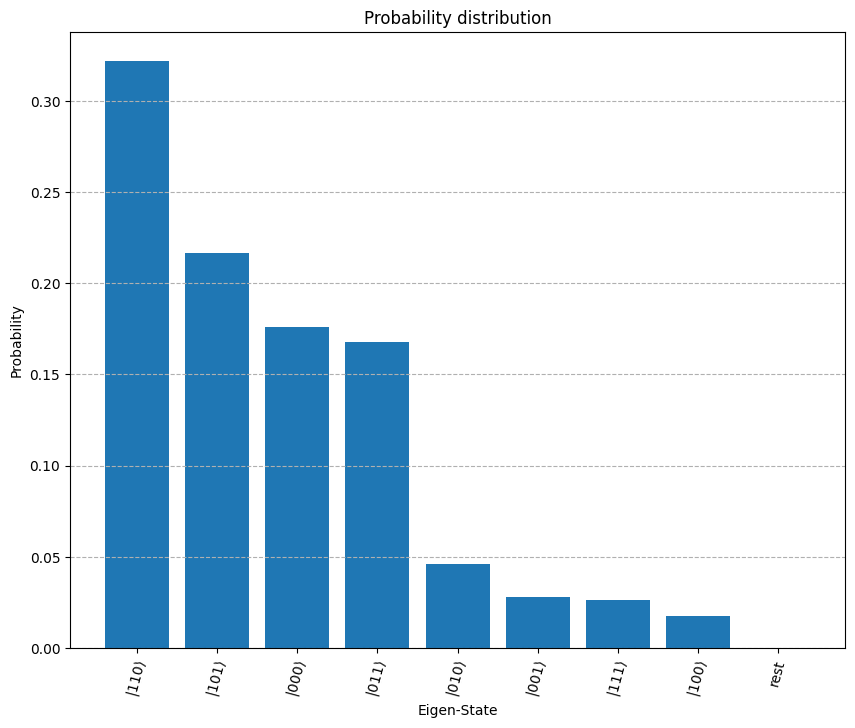

In [52]:
q_custom.results.plot_probabilities()

## RQAOA on a QVM

In [58]:
np_integer = NumberPartition([1,2,3,4,5,15])
np_qubo = np_integer.get_qubo_problem()

In [64]:
from openqaoa.workflows.optimizer import RQAOA

q_rqaoa = QAOA()
q_rqaoa.set_device(device_azure_qvm)

r = RQAOA(qaoa=q_rqaoa, rqaoa_type='custom')

# Set parameters for RQAOA, in this case we fix the steps to 1 (default), the final cutoff value to 3
r.set_rqaoa_parameters(steps = 1, n_cutoff = 3)


In [65]:
r.compile(np_qubo)

WARNING - EnvironmentCredential.get_token failed: EnvironmentCredential authentication unavailable. Environment variables are not fully configured.
Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.


Opening in existing browser session.


In [66]:
r.optimize()

WARNING - EnvironmentCredential.get_token failed: EnvironmentCredential authentication unavailable. Environment variables are not fully configured.
Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.


Opening in existing browser session.
Opening in existing browser session.
Opening in existing browser session.


In [67]:
r.result

{'solution': {'110110': 36.0, '001001': 36.0},
 'classical output': {'minimum energy': -30.0,
  'optimal states': ['110', '001']},
 'elimination rules': [{(4, 5): -1.0}, {(2, 3): -1.0}, {(1, 3): 1.0}],
 'schedule': [1, 1, 1],
 'total steps': 3}